VCB - Vietcombank

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25762.985, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25768.576, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25770.489, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25770.495, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25769.520, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25771.373, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=25774.910, Time=0.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=25763.727, Time=1.72 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=25763.463, Time=0.91 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25771.999, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=25770.326, Time=0.48 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=25770.909, Time=0.44 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=25764.859, Time=2.12 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=25763.123, Time=0.62 sec

Best model:  ARIMA

c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


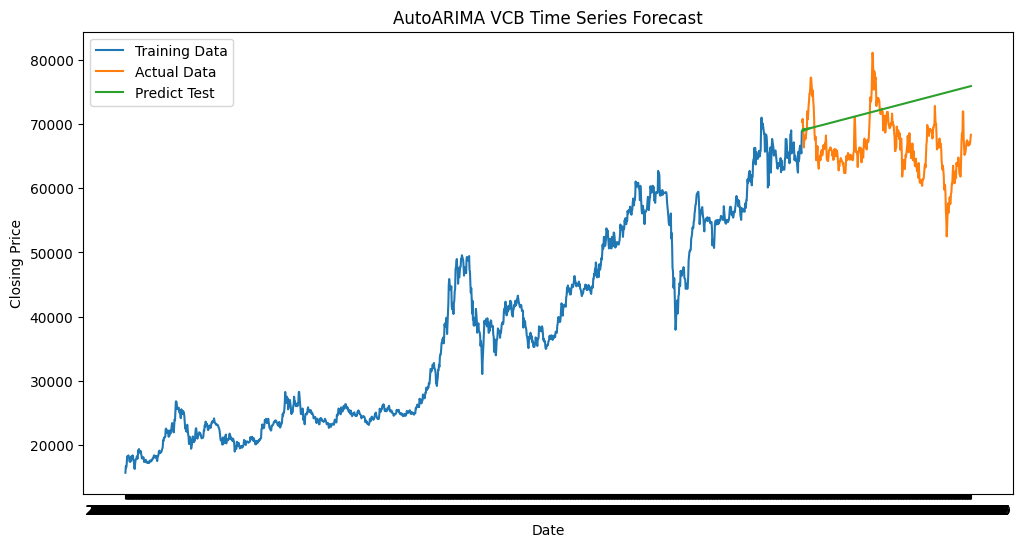

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import numpy as np

data = pd.read_csv('../Dataset/VCB_2015_2023.csv')

# Chỉ sử dụng giá đóng cửa để đơn giản hóa
time_series = data.set_index('Date')['Close']

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.8 * len(time_series))
test_size = int(0.2 * len(time_series))


train_data = time_series[:train_size]
test_data = time_series[train_size:train_size+test_size]


# Tìm kiếm các tham số tốt nhất bằng auto_arima
model = auto_arima(train_data, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

# Fit mô hình với các tham số tốt nhất được tìm kiếm
model.fit(train_data)

# Dự đoán trên tập kiểm tra
predictions = model.predict(n_periods=len(test_data))

date_next_30_days = np.array(range(1, 31)).reshape(-1, 1)


# Trực quan hóa kết quả
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Data')
plt.plot(test_data.index, predictions, label='Predict Test')
plt.title('AutoARIMA VCB Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


CTG - Viettinbank

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=23523.934, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23535.234, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23536.174, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23536.307, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=23536.276, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=23532.143, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=23531.807, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=23525.286, Time=1.02 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=23525.321, Time=0.98 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=23521.525, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=23530.639, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=23530.275, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=23522.696, Time=0.29 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 4.903 seconds


c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


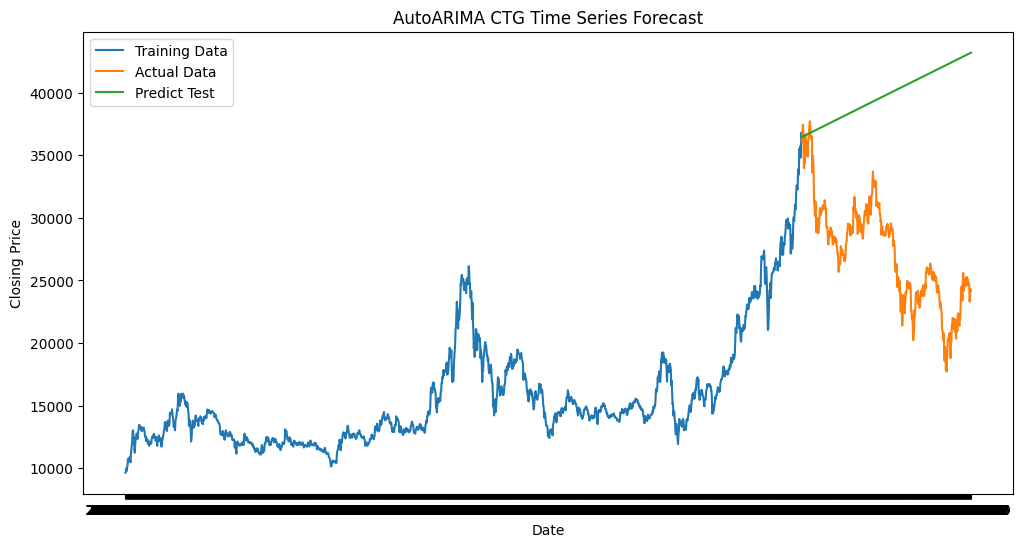

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import numpy as np


data = pd.read_csv('../Dataset/CTG_2015_2023.csv')

# Chỉ sử dụng giá đóng cửa để đơn giản hóa
time_series = data.set_index('Date')['Close']

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.8 * len(time_series))
test_size = int(0.2 * len(time_series))


train_data = time_series[:train_size]
test_data = time_series[train_size:train_size+test_size]


# Tìm kiếm các tham số tốt nhất bằng auto_arima
model = auto_arima(train_data, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

# Fit mô hình với các tham số tốt nhất được tìm kiếm
model.fit(train_data)

# Dự đoán trên tập kiểm tra
predictions = model.predict(n_periods=len(test_data))

date_next_30_days = np.array(range(1, 31)).reshape(-1, 1)


# Trực quan hóa kết quả
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Data')
plt.plot(test_data.index, predictions, label='Predict Test')
plt.title('AutoARIMA CTG Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


BID - BIDV

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=24537.238, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24532.740, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24534.057, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24534.110, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24532.128, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24535.523, Time=0.53 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.193 seconds


c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


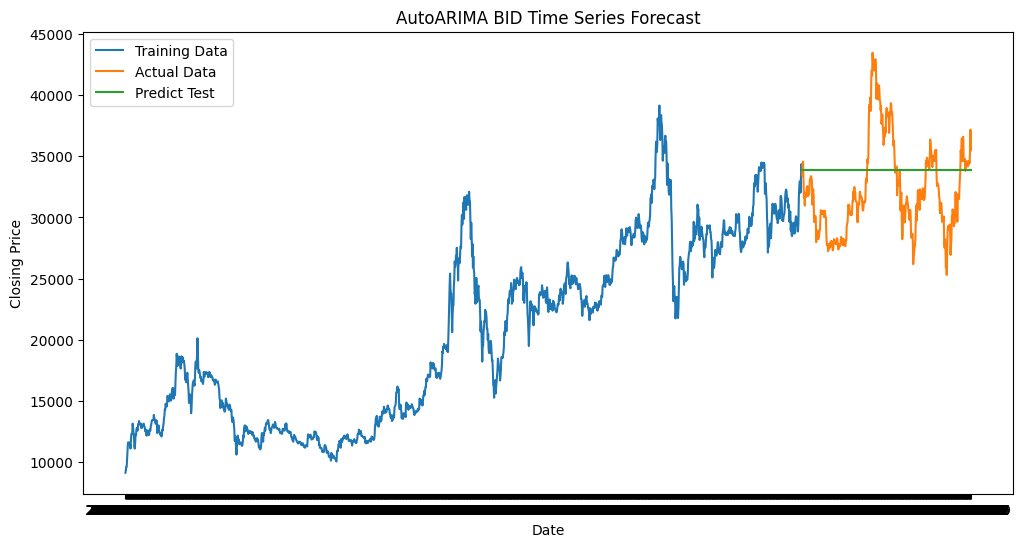

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import numpy as np


data = pd.read_csv('../Dataset/BID_2015_2023.csv')

# Chỉ sử dụng giá đóng cửa để đơn giản hóa
time_series = data.set_index('Date')['Close']

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.8 * len(time_series))
test_size = int(0.2 * len(time_series))


train_data = time_series[:train_size]
test_data = time_series[train_size:train_size+test_size]


# Tìm kiếm các tham số tốt nhất bằng auto_arima
model = auto_arima(train_data, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

# Fit mô hình với các tham số tốt nhất được tìm kiếm
model.fit(train_data)

# Dự đoán trên tập kiểm tra
predictions = model.predict(n_periods=len(test_data))

date_next_30_days = np.array(range(1, 31)).reshape(-1, 1)


# Trực quan hóa kết quả
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Data')
plt.plot(test_data.index, predictions, label='Predict Test')
plt.title('AutoARIMA BID Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()
